<a href="https://colab.research.google.com/github/mckore/Explore_Projects_Tutorials/blob/master/Top2Vec_Tires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install top2vec

In [ ]:
pip install umap-learn

In [70]:
pip install hdbscan

In [71]:
from top2vec import Top2Vec
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

In [14]:
file ='/content/drive/My Drive/tires_reviews_lawnsite2.xlsx'
file

'/content/drive/My Drive/tires_reviews_lawnsite2.xlsx'

In [6]:
df = pd.read_excel(file)

In [9]:
topic_df=df['Review']

In [12]:
topic_str_list =topic_df.values.tolist()

In [ ]:
topic_str_list

In [46]:
reggie = re.compile('said:$')

In [ ]:
s = [i for i in topic_str_list if reggie.findall(i)]
s

In [56]:
m_list =[]
for i in topic_str_list:
  obj_=re.search(reggie, i)
  if not obj_:
    m_list.append(i)

In [ ]:
m_list

In [58]:
model = Top2Vec(m_list, embedding_model='universal-sentence-encoder')

2020-10-27 13:41:14,109 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2020-10-27 13:41:14,157 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2020-10-27 13:41:19,612 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2020-10-27 13:41:20,018 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2020-10-27 13:41:23,073 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2020-10-27 13:41:23,089 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [59]:
model.get_num_topics()

2

In [60]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [61]:
topic_sizes

array([310,  28])

In [63]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [64]:
topic_words

array([['will', 'have', 'my', 'your', 'on', 'is', 'be', 'for', 'it',
        'with', 'at', 'not', 'can', 'in', 'the', 'they', 'but', 'if',
        'that', 'you', 'to', 'of', 'we', 'and'],
       ['be', 'if', 'at', 'not', 'in', 'can', 'but', 'to', 'we', 'the',
        'and', 'of', 'will', 'is', 'on', 'for', 'my', 'your', 'you',
        'it', 'with', 'that', 'have', 'they']], dtype='<U4')

In [16]:
model.save('/content/drive/My Drive/topvecmodel')

In [66]:
#TopicBERT
model_2= SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model_2.encode(m_list, show_progress_bar =True)

100%|██████████| 245M/245M [00:17<00:00, 13.9MB/s]


In [84]:
#UMAP Embeddings
umap_embeddings = umap.UMAP(n_neighbors=10,
                            n_components =2,
                            metric ='cosine').fit_transform(embeddings)

In [78]:
umap_embeddings

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=5, n_epochs=None,
     n_neighbors=10, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [85]:
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

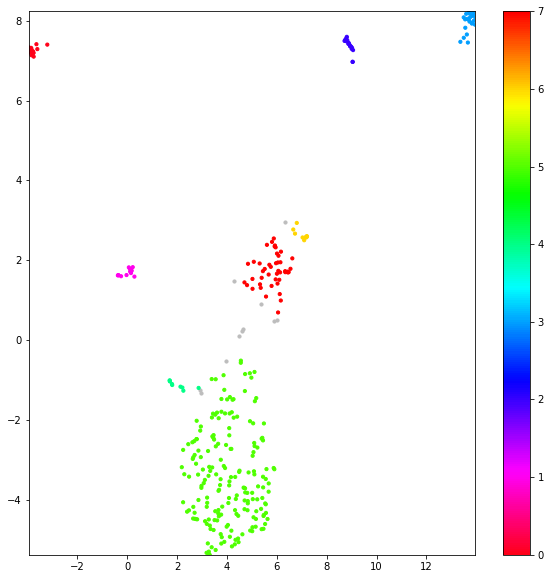

In [100]:
#Clustering Dry Run
result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=10)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=10, cmap='hsv_r')
plt.margins(0)
plt.colorbar()